<a id = '4.0'></a>
<p style = "font-size : 20px; color : #000000 ; font-family : 'Times New Roman'; text-align : center; background-color : rgba(255, 0, 0, 0.5); border-radius: 1px 1px;"><strong>Hotel management model of 10 room small hotel yearly Analysis with the help of database: </strong></p> 

<a id='4.0'></a>
<p style="font-size: 20px; color: #00000; font-family: 'Times New Roman'; display: flex; align-items: center;">
    <span style="background-color: #AAAAAA; padding: 2px 10px; border-radius: 1px;"><strong>Importing libraries:-</strong></span>
</p>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

<a id='4.0'></a>
<p style="font-size: 20px; color: #00000; font-family: 'Times New Roman'; display: flex; align-items: center;">
    <span style="background-color: #AAAAAA; padding: 2px 10px; border-radius: 1px;"><strong>Establish a connection to the MySQL database:-</strong></span>
</p>


In [ ]:
import mysql.connector

mydb = mysql.connector.connect(   
  host='localhost',
  user='root',
  password='Qwerty593@',
  database='hotel'
)

In [5]:
# Creating the cursor object :
cursor = mydb.cursor()

cursor.execute("SHOW TABLES;")

table_list = [table[0] for table in cursor]

####  Print the list of tables
print("List of tables present in the database:")
for table in table_list:
    print("-----")
    print(table)



List of tables present in the database:
-----
address
-----
booking
-----
customer
-----
reservation
-----
room_pay


<a id='4.0'></a>
<p style="font-size: 20px; color: #00000; font-family: 'Times New Roman'; display: flex; align-items: center;">
    <span style="background-color: #AAAAAA; padding: 2px 10px; border-radius: 1px;"><strong>Data Exploration:-</strong></span>
</p>


In [6]:
customer_data = pd.read_sql_query("select * from  customer",mydb)
customer_data.head() 

,customer_id,customer_name,phone_number,id_type,booking_id
0,0003300268,Ava Johnson,1611299917,pan card,1406
1,0006239685,Isabella Davis,9871765321,drivers license,1852
2,0006833477,William Smith,9333962178,voter ID,4422
3,0007362183,William Smith,7251836677,pan card,6685
4,0009934028,Micheal Brown,9142112848,drivers license,5541


In [7]:
customer_data.shape

(7230, 5)

In [8]:
booking_data = pd.read_sql_query("select * from  booking",mydb)
booking_data.head() 

,booking_id,booking_type,booking_date
0,1,online,2022-05-07
1,2,offline,2023-02-19
2,3,offline,2022-04-22
3,4,offline,2022-04-28
4,5,online,2023-02-24


In [9]:
booking_data.shape

(7230, 3)

In [10]:
reservation_data = pd.read_sql_query("select * from  reservation",mydb)
reservation_data.head() 

,check_in_date,check_out_date,No_of_days,booking_id
0,2022-04-08,2022-04-09,1,1
1,2022-06-25,2022-07-02,7,2
2,2022-07-11,2022-07-16,5,3
3,2023-02-12,2023-02-19,7,4
4,2022-06-20,2022-06-21,1,5


In [11]:
reservation_data.shape

(7139, 4)

In [12]:
room_data = pd.read_sql_query("select * from  room_pay",mydb)
room_data.head() 

,Room_no,Room_type,No_of_adults,Room_price,Advance_collect,Left_amount,total_room_price,booking_id
0,201,Double,1,1600,1417,183,1600.0,1
1,202,Double,3,1600,849,10351,11200.0,2
2,203,Double,1,1600,1396,6604,8000.0,3
3,204,Double,3,1600,1332,9868,11200.0,4
4,105,Single,2,950,538,412,950.0,5


In [13]:
room_data.shape

(7230, 8)

In [14]:
address_data = pd.read_sql_query("select * from  address",mydb)
address_data.head() 

,Street,City,State,Country,booking_id
0,Street 57,New York,Washington,Germany,1
1,Street 74,San Francisco,Massachusetts,United States,2
2,Street 49,San Francisco,Washington,France,3
3,Street 58,Chicago,Illinois,Japan,4
4,Street 69,Chicago,Florida,United States,5


In [15]:
address_data.shape

(10215, 5)

<a id='4.0'></a>
<p style="font-size: 20px; color: #00000; font-family: 'Times New Roman'; display: flex; align-items: center;">
    <span style="background-color: #AAAAAA; padding: 2px 10px; border-radius: 1px;"><strong>Getting info :-</strong></span>
</p>



##### The column names and their datatypes in the database (hotel) ...

In [16]:
for table in table_list:
    print('\nTable Name >',table,':')
    cursor.execute(f"SELECT COLUMN_NAME,DATA_TYPE FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '{table}'")
    column_info = cursor.fetchall()
    for column in column_info:
        print(column[0],'=', column[1])


Table Name > address :
Street = varchar
City = varchar
State = varchar
Country = varchar
booking_id = int
address_id = smallint
address = varchar
address2 = varchar
district = varchar
city_id = smallint
postal_code = varchar
phone = varchar
location = geometry
last_update = timestamp

Table Name > booking :
booking_id = int
booking_type = varchar
booking_date = date

Table Name > customer :
customer_id = varchar
customer_name = varchar
phone_number = varchar
id_type = varchar
booking_id = int
customer_id = smallint
store_id = tinyint
first_name = varchar
last_name = varchar
email = varchar
address_id = smallint
active = tinyint
create_date = datetime
last_update = timestamp

Table Name > reservation :
check_in_date = date
check_out_date = date
No_of_days = int
booking_id = int

Table Name > room_pay :
Room_no = int
Room_type = varchar
No_of_adults = int
Room_price = int
Advance_collect = int
Left_amount = int
total_room_price = int
booking_id = int


### Checking null values:

In [17]:
for table in table_list:
    print('\nTable Name >',table,':')
    df_table = pd.read_sql_query(f"select * from {table}",mydb)
    print(df_table.isnull().sum())
   


Table Name > address :
Street        0
City          0
State         0
Country       0
booking_id    0
dtype: int64

Table Name > booking :
booking_id      0
booking_type    0
booking_date    0
dtype: int64

Table Name > customer :
customer_id      0
customer_name    0
phone_number     0
id_type          0
booking_id       0
dtype: int64

Table Name > reservation :
check_in_date     0
check_out_date    0
No_of_days        0
booking_id        0
dtype: int64

Table Name > room_pay :
Room_no              0
Room_type            0
No_of_adults         0
Room_price           0
Advance_collect      0
Left_amount          0
total_room_price    91
booking_id           0
dtype: int64


<a id='4.0'></a>
<p style="font-size: 20px; color: #00000; font-family: 'Times New Roman'; display: flex; align-items: center;">
    <span style="background-color: #39CCCC; padding: 2px 10px; border-radius: 1px;"><strong>Consistent data with no null values</strong></span>
</p>


<a id='4.0'></a>
<p style="font-size: 20px; color: #00000; font-family: 'Times New Roman'; display: flex; align-items: center;">
    <span style="background-color: #AAAAAA; padding: 2px 10px; border-radius: 1px;"><strong>BASIC ANALYSIS</strong></span>
</p>


<a id='4.0'></a>
<p style="font-size: 20px; color: #000000; font-family: 'Times New Roman';">
    <ul style="list-style-type: disc; padding-left: 20px; margin: 0;">
        <li>Maximum Customers visits on hotel in which month</li>
        <li>Maximum Customers comes from which city, state, and country</li>
        <li>Which type of room is booked maximum time</li>
        <li>Maximum customer booked hotel on which mode 'offline' or 'online'</li>
        <li>How many maximum days customers prefer to stay</li>
        <li>Which type of ID people used mostly</li>
        <li>Total revenue earned in the year</li>
    </ul>
</p>


### - Maximum Customers visits on hotel in which month 

In [18]:
reservation_data.head()

,check_in_date,check_out_date,No_of_days,booking_id
0,2022-04-08,2022-04-09,1,1
1,2022-06-25,2022-07-02,7,2
2,2022-07-11,2022-07-16,5,3
3,2023-02-12,2023-02-19,7,4
4,2022-06-20,2022-06-21,1,5


In [19]:
## we need months only so :
reservation_data['check_in_date'] = pd.to_datetime(reservation_data['check_in_date'])

reservation_data['month'] = reservation_data['check_in_date'].dt.month    

In [20]:
reservation_data

,check_in_date,check_out_date,No_of_days,booking_id,month
0,2022-04-08,2022-04-09,1,1,4
1,2022-06-25,2022-07-02,7,2,6
2,2022-07-11,2022-07-16,5,3,7
3,2023-02-12,2023-02-19,7,4,2
4,2022-06-20,2022-06-21,1,5,6
...,...,...,...,...,...
7134,2022-10-13,2022-10-21,8,7226,10
7135,2022-09-03,2022-09-04,1,7227,9
7136,2022-10-09,2022-10-12,3,7228,10
7137,2022-09-07,2022-09-10,3,7229,9


In [21]:
sns.set_style('whitegrid')

Text(0, 0.5, 'Booking ID ')

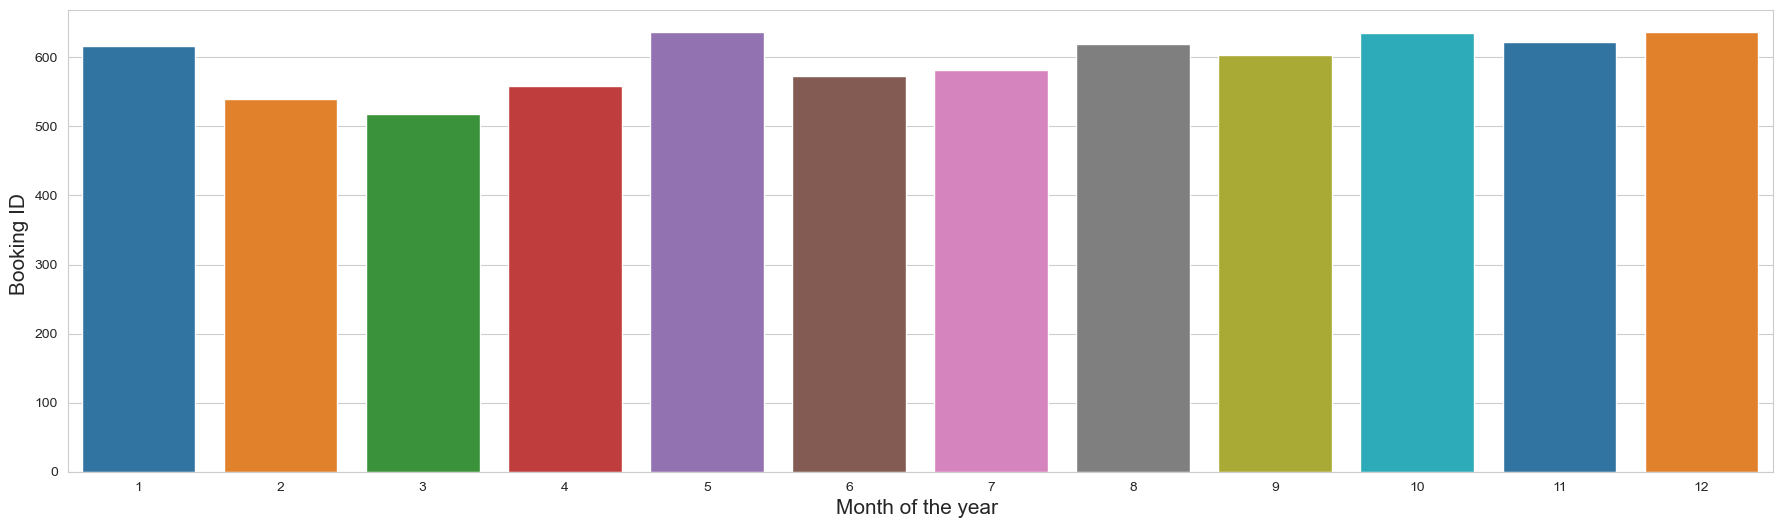

In [108]:
plt.figure(figsize=(22,6))
sns.countplot(data=reservation_data,x='month',palette='tab10')
plt.xlabel('Month of the year ',fontsize =15)
plt.ylabel('Booking ID ',fontsize =15)

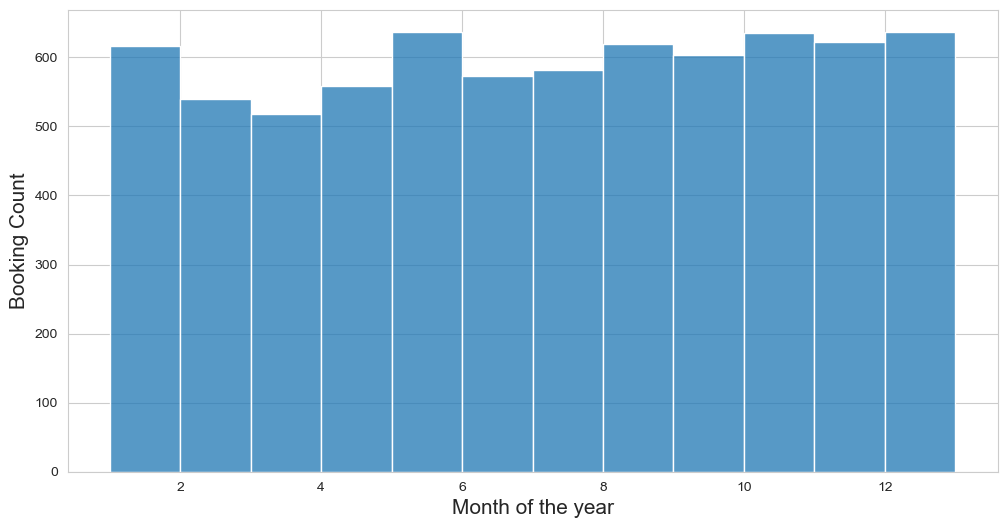

In [106]:
bins = [i for i in range(1, 14)]
plt.figure(figsize=(12, 6))
sns.histplot(data=reservation_data, x='month', bins=bins, kde=False,)

plt.xlabel('Month of the year', fontsize=15)
plt.ylabel('Booking Count', fontsize=15)

plt.show()

#### Here from 1 to 12 month start from january to december

### So this conclude that January, May ,October and December month the business is good in the hotel

###  - Maximum  customer comes from which city,state and country 

In [23]:
address_data.head()

,Street,City,State,Country,booking_id
0,Street 57,New York,Washington,Germany,1
1,Street 74,San Francisco,Massachusetts,United States,2
2,Street 49,San Francisco,Washington,France,3
3,Street 58,Chicago,Illinois,Japan,4
4,Street 69,Chicago,Florida,United States,5


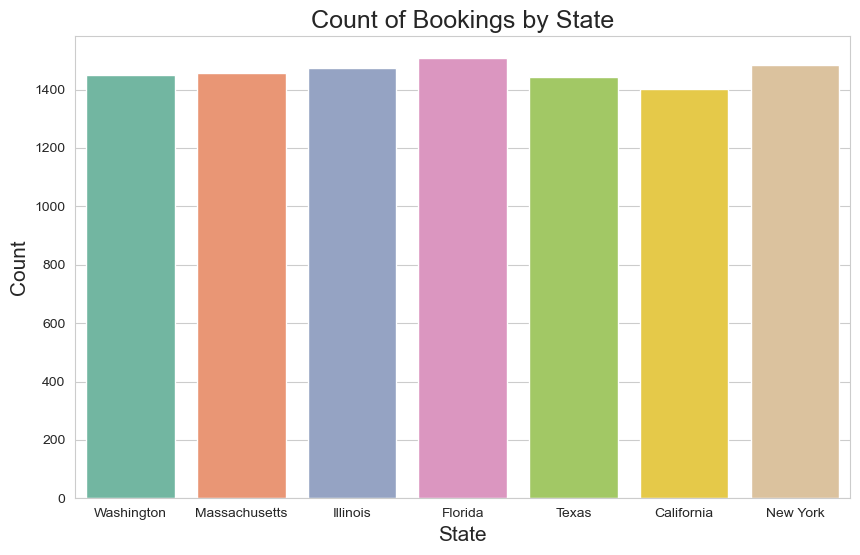

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(data=address_data, x='State', palette='Set2')
plt.xlabel('State', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of Bookings by State', fontsize=18)
plt.show()

<a id='4.0'></a>
<p style="font-size: 20px; color: #00000; font-family: 'Times New Roman'; display: flex; align-items: center;">
    <span style="background-color: #39CCCC; padding: 2px 10px; border-radius: 1px;"><strong>So that concludes that florida and from New York state maximum customer visit in a Year </strong></span>
</p>

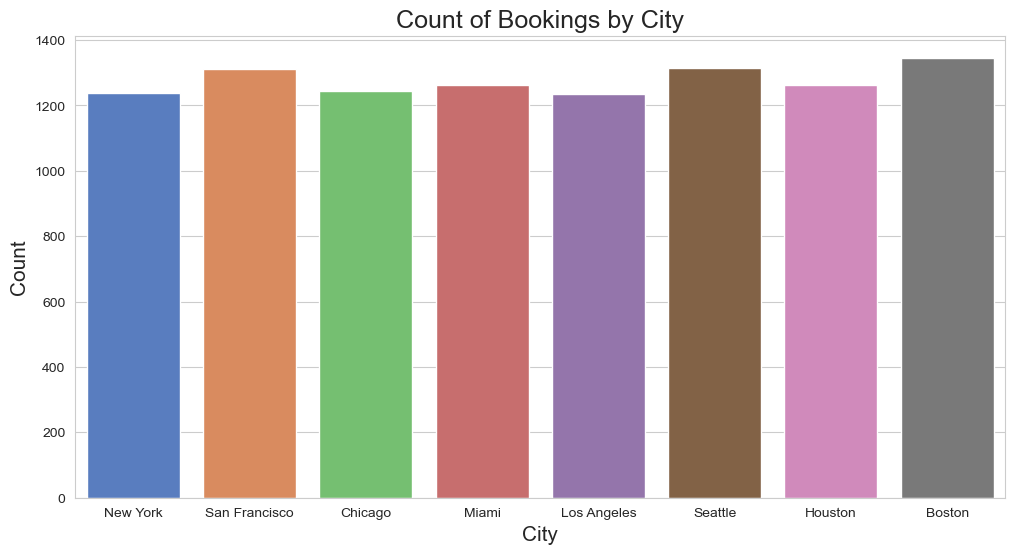

In [113]:
plt.figure(figsize=(12,6))
sns.countplot(data=address_data, x='City', palette='muted')
plt.xlabel('City', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of Bookings by City', fontsize=18)
plt.show()

<a id='4.0'></a>
<p style="font-size: 20px; color: #00000; font-family: 'Times New Roman'; display: flex; align-items: center;">
    <span style="background-color: #39CCCC; padding: 2px 10px; border-radius: 1px;"><strong>So that concludes that from Boston City maximum customer visit in a Year </strong></span>
</p>

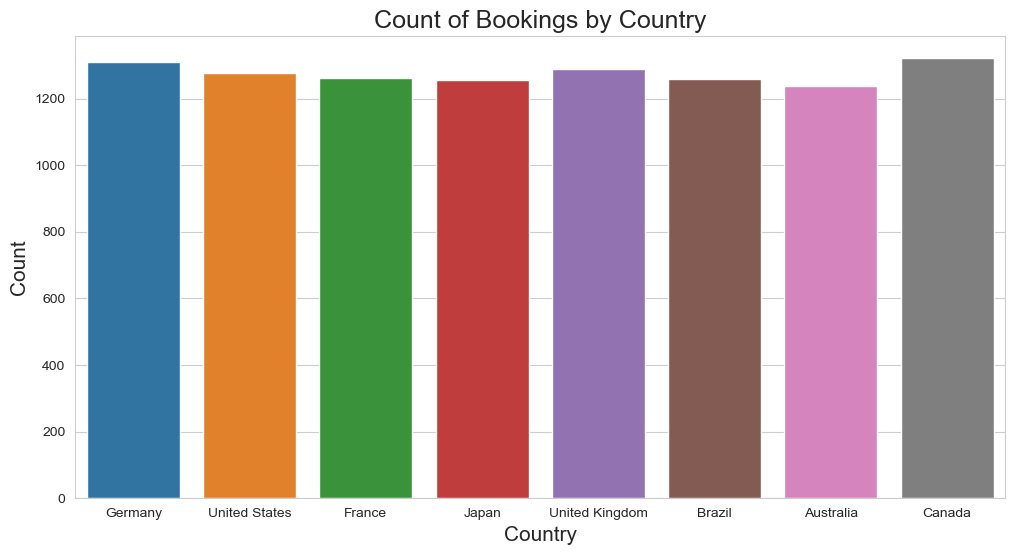

In [109]:
plt.figure(figsize=(12,6))
sns.countplot(data=address_data, x='Country', palette='tab10')
plt.xlabel('Country', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of Bookings by Country', fontsize=18)
plt.show()

<a id='4.0'></a>
<p style="font-size: 20px; color: #00000; font-family: 'Times New Roman'; display: flex; align-items: center;">
    <span style="background-color: #39CCCC; padding: 2px 10px; border-radius: 1px;"><strong>So that concludes that Canada Country  maximum customer visit in a Year  </strong></span>
</p>

## - Which type of room is booked maximum time

In [27]:
room_data.head()

,Room_no,Room_type,No_of_adults,Room_price,Advance_collect,Left_amount,total_room_price,booking_id
0,201,Double,1,1600,1417,183,1600.0,1
1,202,Double,3,1600,849,10351,11200.0,2
2,203,Double,1,1600,1396,6604,8000.0,3
3,204,Double,3,1600,1332,9868,11200.0,4
4,105,Single,2,950,538,412,950.0,5


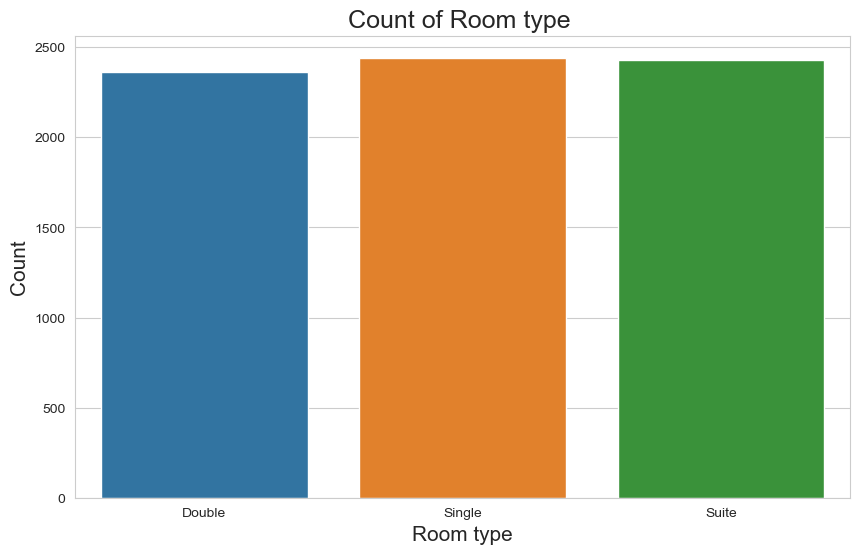

In [121]:
plt.figure(figsize=(10,6))
sns.countplot(data=room_data, x='Room_type', palette='tab10')
plt.xlabel('Room type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of Room type ', fontsize=18)
plt.show()

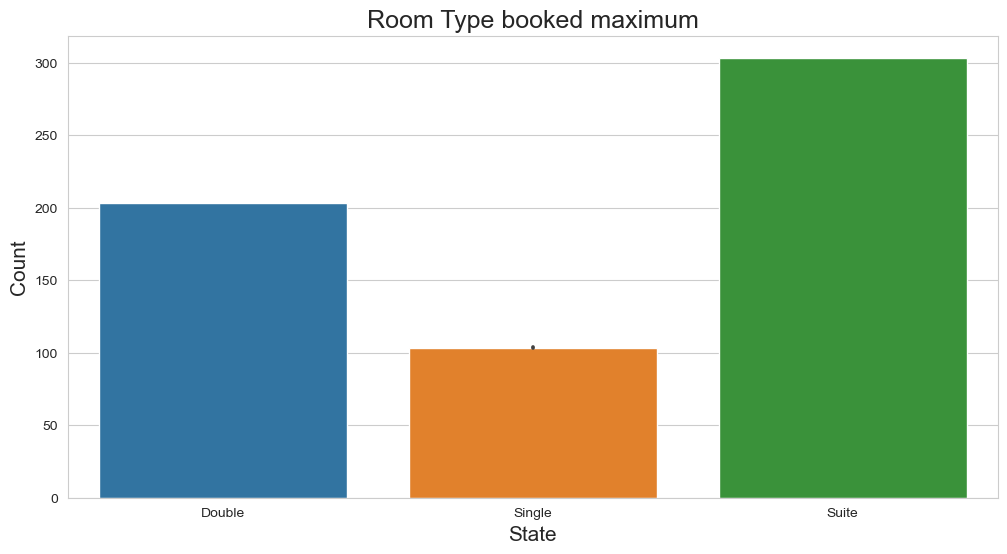

In [119]:
plt.figure(figsize=(12,6))
sns.barplot(data=room_data, y="Room_no",x="Room_type")
plt.xlabel('State', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Room Type booked maximum', fontsize=18)
plt.show()

###  - Maximum customer booked hotel on which mode 'offline' or 'online'

In [31]:
booking_data.head()

,booking_id,booking_type,booking_date
0,1,online,2022-05-07
1,2,offline,2023-02-19
2,3,offline,2022-04-22
3,4,offline,2022-04-28
4,5,online,2023-02-24


Text(0, 0.5, 'Booking ID ')

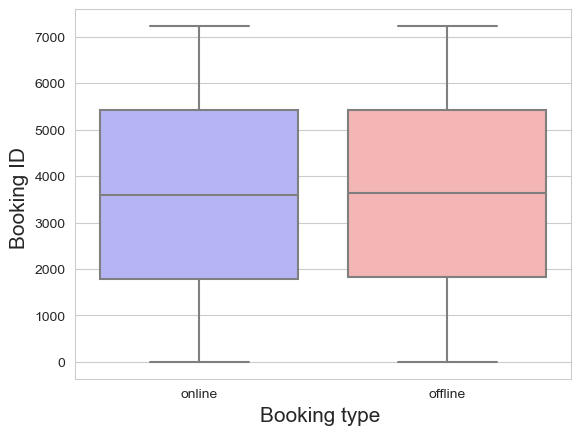

In [122]:
sns.boxplot(data=booking_data,y='booking_id',x='booking_type',palette='bwr')
plt.xlabel('Booking type ',fontsize =15)
plt.ylabel('Booking ID ',fontsize =15)

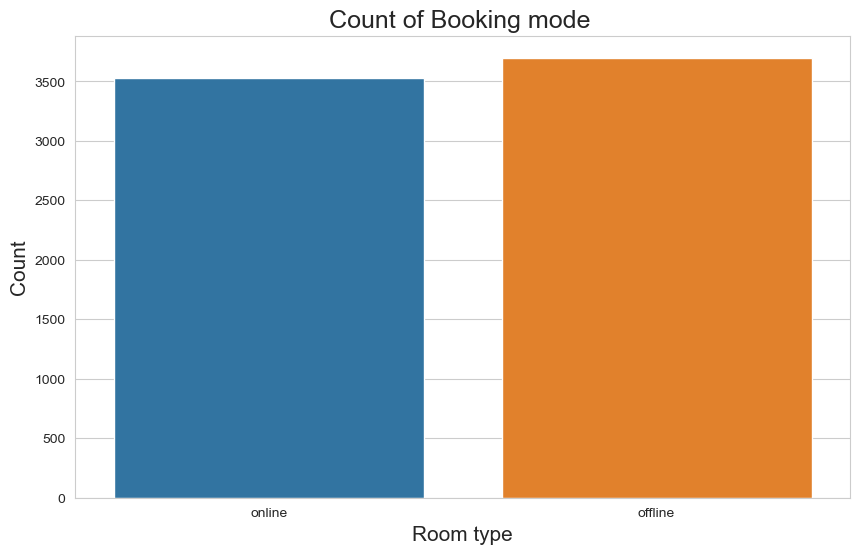

In [124]:
plt.figure(figsize=(10,6))
sns.countplot(data=booking_data, x='booking_type', palette='tab10')
plt.xlabel('Room type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of Booking mode ', fontsize=18)
plt.show()

###  -  How many maximum days customers prefer to stay 

In [33]:
reservation_data.head()

,check_in_date,check_out_date,No_of_days,booking_id,month
0,2022-04-08,2022-04-09,1,1,4
1,2022-06-25,2022-07-02,7,2,6
2,2022-07-11,2022-07-16,5,3,7
3,2023-02-12,2023-02-19,7,4,2
4,2022-06-20,2022-06-21,1,5,6


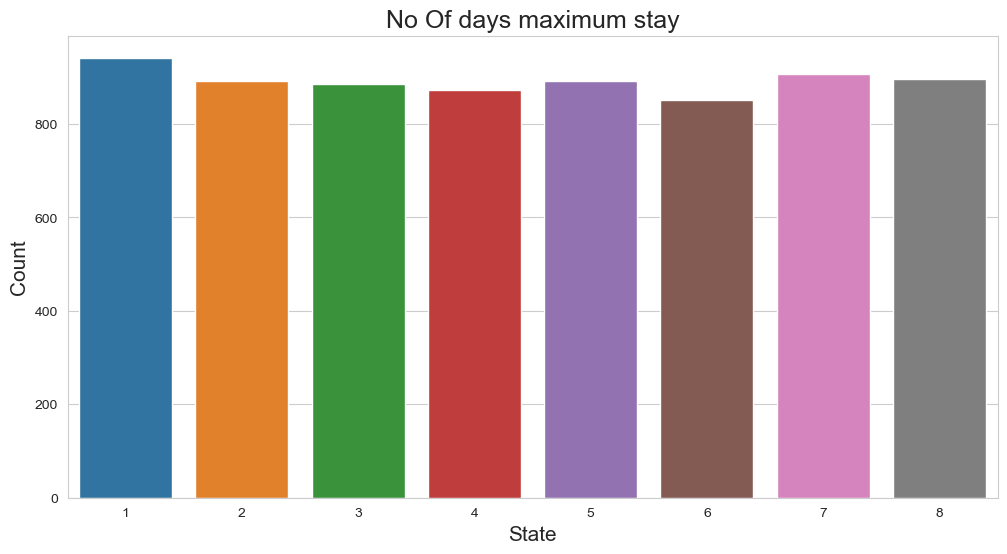

In [125]:
plt.figure(figsize=(12,6))
sns.countplot(data=reservation_data, x='No_of_days', palette='tab10')
plt.xlabel('State', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('No Of days maximum stay', fontsize=18)
plt.show()

### - Which type of id people used mostly

In [35]:
customer_data.head()

,customer_id,customer_name,phone_number,id_type,booking_id
0,0003300268,Ava Johnson,1611299917,pan card,1406
1,0006239685,Isabella Davis,9871765321,drivers license,1852
2,0006833477,William Smith,9333962178,voter ID,4422
3,0007362183,William Smith,7251836677,pan card,6685
4,0009934028,Micheal Brown,9142112848,drivers license,5541


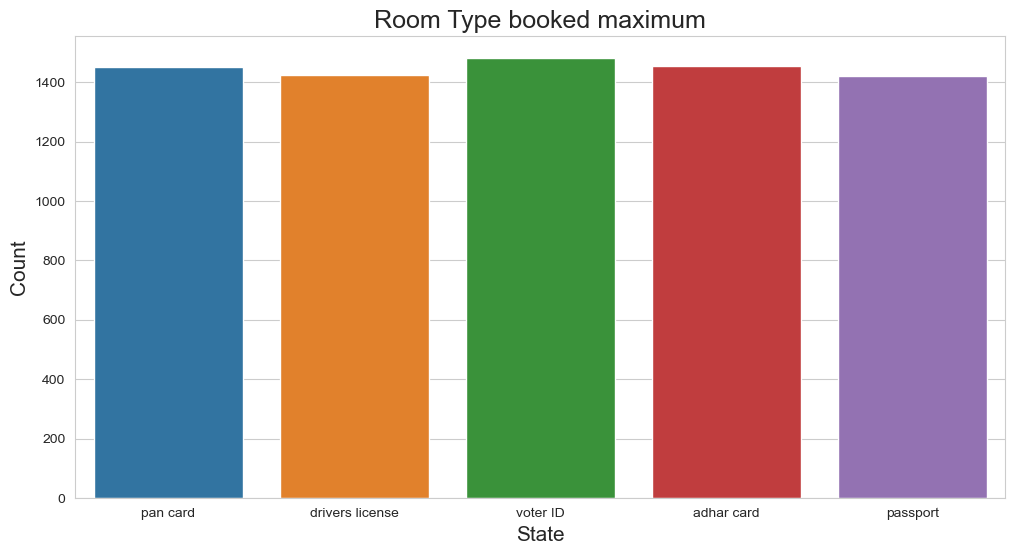

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(data=customer_data, x='id_type', palette='tab10')
plt.xlabel('State', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Room Type booked maximum', fontsize=18)
plt.show()

### - Total revenue earned in year

In [37]:
room_data.head()

,Room_no,Room_type,No_of_adults,Room_price,Advance_collect,Left_amount,total_room_price,booking_id
0,201,Double,1,1600,1417,183,1600.0,1
1,202,Double,3,1600,849,10351,11200.0,2
2,203,Double,1,1600,1396,6604,8000.0,3
3,204,Double,3,1600,1332,9868,11200.0,4
4,105,Single,2,950,538,412,950.0,5


In [38]:
room_count = room_data['Room_price'].value_counts()
print(room_count)

950     2447
3500    2410
1600    2373
Name: Room_price, dtype: int64


In [39]:
total_revenue = room_data['Room_price'].sum()
print("Total yearly money earned :",total_revenue)

Total yearly money earned : 14556450


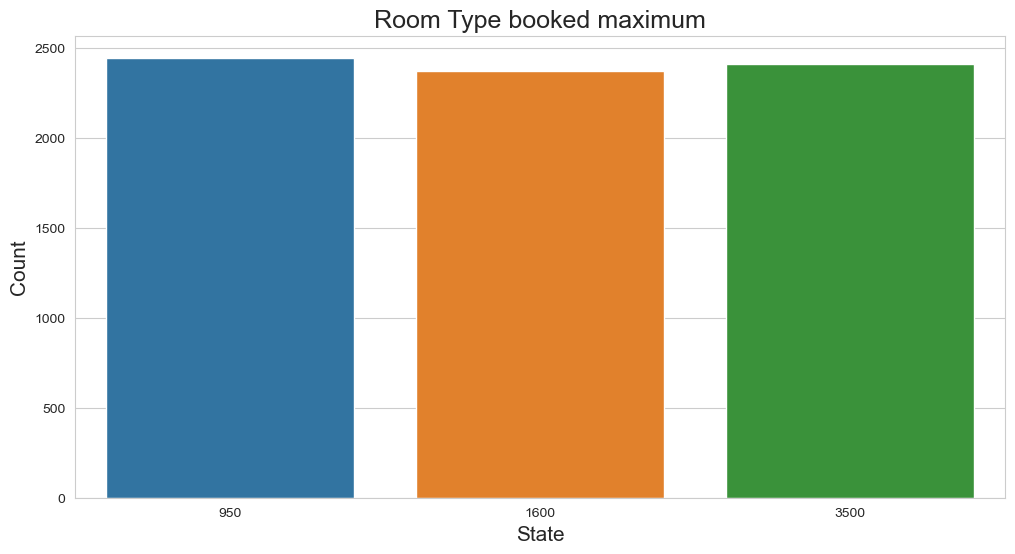

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(data=room_data, x='Room_price', palette='tab10')
plt.xlabel('State', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Room Type booked maximum', fontsize=18)
plt.show()

In [41]:
merged_df = pd.merge(booking_data, reservation_data, on="booking_id")
merged_df = pd.merge(merged_df, room_data, on="booking_id")
merged_df = pd.merge(merged_df,customer_data, on="booking_id")
merged_df = pd.merge(merged_df, address_data, on="booking_id")

In [42]:
merged_df.head()

,booking_id,booking_type,booking_date,check_in_date,check_out_date,No_of_days,month,Room_no,Room_type,No_of_adults,...,Left_amount,total_room_price,customer_id,customer_name,phone_number,id_type,Street,City,State,Country
0,1,online,2022-05-07,2022-04-08,2022-04-09,1,4,201,Double,1,...,183,1600.0,8113821290,Jerry Wilson,9003201840,drivers license,Street 57,New York,Washington,Germany
1,2,offline,2023-02-19,2022-06-25,2022-07-02,7,6,202,Double,3,...,10351,11200.0,7685938510,Sophia Williams,4054396723,pan card,Street 74,San Francisco,Massachusetts,United States
2,3,offline,2022-04-22,2022-07-11,2022-07-16,5,7,203,Double,1,...,6604,8000.0,7545820200,John Davis,9829177051,passport,Street 49,San Francisco,Washington,France
3,4,offline,2022-04-28,2023-02-12,2023-02-19,7,2,204,Double,3,...,9868,11200.0,1745091673,William Wilson,3070064343,pan card,Street 58,Chicago,Illinois,Japan
4,5,online,2023-02-24,2022-06-20,2022-06-21,1,6,105,Single,2,...,412,950.0,6235754947,Ava Smith,3263838676,voter ID,Street 69,Chicago,Florida,United States


In [43]:
merged_df.nunique()

booking_id          7139
booking_type           2
booking_date         364
check_in_date        363
check_out_date       364
No_of_days             8
month                 12
Room_no               18
Room_type              3
No_of_adults           4
Room_price             3
Advance_collect     2394
Left_amount         5761
total_room_price      24
customer_id         7139
customer_name        176
phone_number        7139
id_type                5
Street               100
City                   8
State                  7
Country                8
dtype: int64

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

#### so as we see above there is column's name - booking type,room type,countrym,idtype
#### They are categorical columns but unique values 2 or 3 only so we convert them into dummy variables let do it...

In [44]:
merged_df.columns

Index(['booking_id', 'booking_type', 'booking_date', 'check_in_date',
       'check_out_date', 'No_of_days', 'month', 'Room_no', 'Room_type',
       'No_of_adults', 'Room_price', 'Advance_collect', 'Left_amount',
       'total_room_price', 'customer_id', 'customer_name', 'phone_number',
       'id_type', 'Street', 'City', 'State', 'Country'],
      dtype='object')

In [45]:
bktype = pd.get_dummies(merged_df['booking_type'],drop_first=True)
rmtype = pd.get_dummies(merged_df['Room_type'],drop_first=True)
country = pd.get_dummies(merged_df['Country'],drop_first=True)
idtype = pd.get_dummies(merged_df['id_type'],drop_first=True)

In [46]:
merged_df.drop(['City','customer_id' ,'customer_name', 'phone_number', 'Street','State','booking_date' ,'check_in_date' ,'check_out_date','booking_type','Room_type','Country','id_type'],axis=1,inplace=True)

In [47]:
df = pd.concat([merged_df,bktype,rmtype,country,idtype],axis=1)

In [48]:
df.head()

,booking_id,No_of_days,month,Room_no,No_of_adults,Room_price,Advance_collect,Left_amount,total_room_price,online,...,Canada,France,Germany,Japan,United Kingdom,United States,drivers license,pan card,passport,voter ID
0,1,1,4,201,1,1600,1417,183,1600.0,1,...,0,0,1,0,0,0,1,0,0,0
1,2,7,6,202,3,1600,849,10351,11200.0,0,...,0,0,0,0,0,1,0,1,0,0
2,3,5,7,203,1,1600,1396,6604,8000.0,0,...,0,1,0,0,0,0,0,0,1,0
3,4,7,2,204,3,1600,1332,9868,11200.0,0,...,0,0,0,1,0,0,0,1,0,0
4,5,1,6,105,2,950,538,412,950.0,1,...,0,0,0,0,0,1,0,0,0,1


In [49]:
a = df.drop(['Left_amount'],inplace =True,axis =1)

In [50]:
df.columns

Index(['booking_id', 'No_of_days', 'month', 'Room_no', 'No_of_adults',
       'Room_price', 'Advance_collect', 'total_room_price', 'online', 'Single',
       'Suite', 'Brazil', 'Canada', 'France', 'Germany', 'Japan',
       'United Kingdom', 'United States', 'drivers license', 'pan card',
       'passport', 'voter ID'],
      dtype='object')

<a id = '4.0'></a>
<p style = "font-size : 20px; color : #000000 ; font-family : 'Times New Roman'; text-align : center; background-color : rgba(0, 0, 255, 0.5); border-radius: 1px 1px;"><strong>Model Building</strong></p> 

<a id = '4.0'></a>
<p style = "font-size : 20px; color : #000000 ; font-family : 'Times New Roman'; text-align : center; background-color : rgba(255, 0, 0, 0.5); border-radius: 1px 1px;"><strong>LINEAR REGRESSION:(SUPERVISED LEARNING)</strong></p> 

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. ** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Room price " column. **


In [51]:
df.head()

,booking_id,No_of_days,month,Room_no,No_of_adults,Room_price,Advance_collect,total_room_price,online,Single,...,Canada,France,Germany,Japan,United Kingdom,United States,drivers license,pan card,passport,voter ID
0,1,1,4,201,1,1600,1417,1600.0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,2,7,6,202,3,1600,849,11200.0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,3,5,7,203,1,1600,1396,8000.0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,4,7,2,204,3,1600,1332,11200.0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,5,1,6,105,2,950,538,950.0,1,1,...,0,0,0,0,0,1,0,0,0,1


In [52]:
df.head()

,booking_id,No_of_days,month,Room_no,No_of_adults,Room_price,Advance_collect,total_room_price,online,Single,...,Canada,France,Germany,Japan,United Kingdom,United States,drivers license,pan card,passport,voter ID
0,1,1,4,201,1,1600,1417,1600.0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,2,7,6,202,3,1600,849,11200.0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,3,5,7,203,1,1600,1396,8000.0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,4,7,2,204,3,1600,1332,11200.0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,5,1,6,105,2,950,538,950.0,1,1,...,0,0,0,0,0,1,0,0,0,1


In [53]:
df.columns

Index(['booking_id', 'No_of_days', 'month', 'Room_no', 'No_of_adults',
       'Room_price', 'Advance_collect', 'total_room_price', 'online', 'Single',
       'Suite', 'Brazil', 'Canada', 'France', 'Germany', 'Japan',
       'United Kingdom', 'United States', 'drivers license', 'pan card',
       'passport', 'voter ID'],
      dtype='object')

In [54]:
y = df['total_room_price']
X = df[[ 'Room_price','No_of_days','month','online']]

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X

,Room_price,No_of_days,month,online
0,1600,1,4,1
1,1600,7,6,0
2,1600,5,7,0
3,1600,7,2,0
4,950,1,6,1
...,...,...,...,...
10078,950,3,10,0
10079,950,3,9,1
10080,950,3,9,1
10081,3500,2,4,0


In [57]:
np.random.seed(42)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Predictions and Evaluations
** Now predict values for the testing data.**

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [59]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [60]:
lm = LinearRegression()

In [61]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [62]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [   4.47326023 2026.94436429   12.26216543   -7.04851239]


In [63]:
lm.intercept_

-9183.019655092909

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

**Use lm.predict() to predict off the X_test set of the data.**

In [64]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

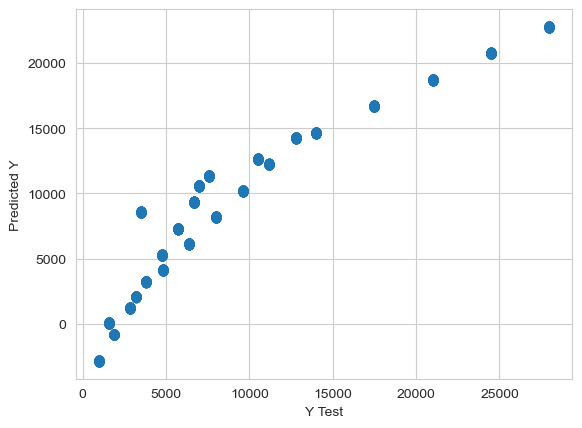

In [65]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

<Axes: >

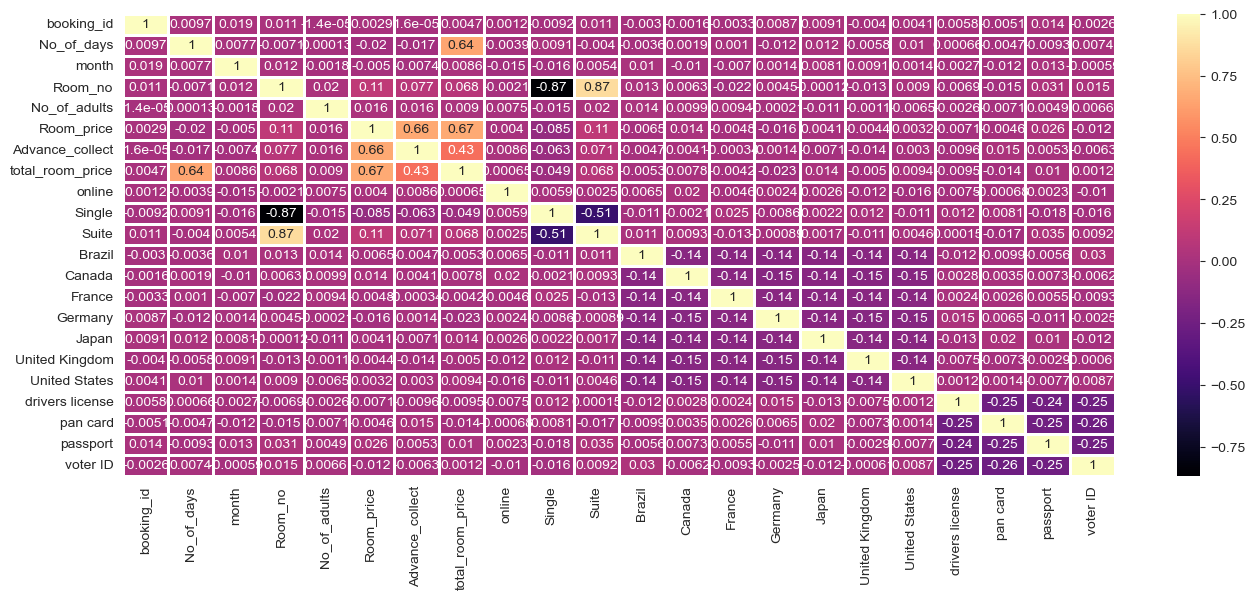

In [66]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

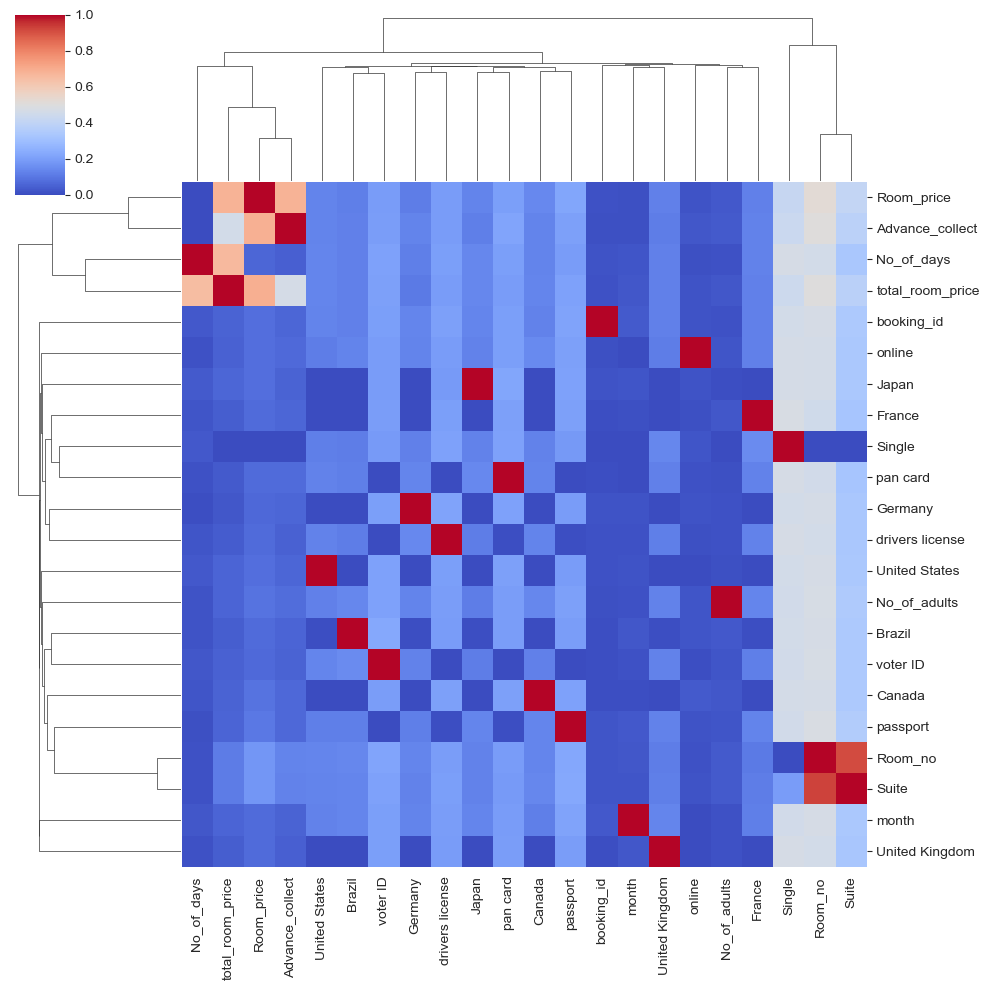

In [67]:
sns.clustermap(df.corr(),cmap='coolwarm',standard_scale=1)

<Axes: xlabel='total_room_price', ylabel='Density'>

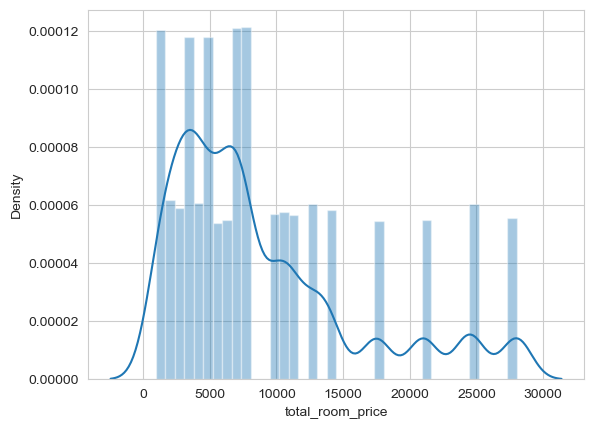

In [68]:
sns.distplot(df['total_room_price'])

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [69]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2010.9113103908967
MSE: 6224379.394189189
RMSE: 2494.870616723278


In [70]:
r2_lr = r2_score(y_test, predictions)
print(r2_lr)

0.8744924851798834


## Residuals

We have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Now we Plot a distplot of the residuals and make sure it looks normally distributed**

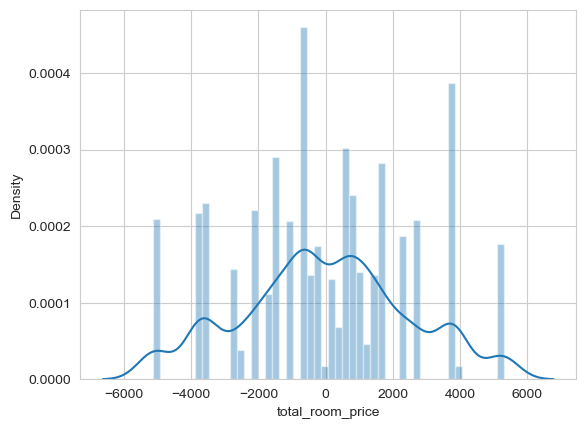

In [71]:
sns.distplot((y_test-predictions),bins=50);

### so as we see here the model is good fit and normally distributed

In [72]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Room_price,4.473260
No_of_days,2026.944364
month,12.262165
online,-7.048512


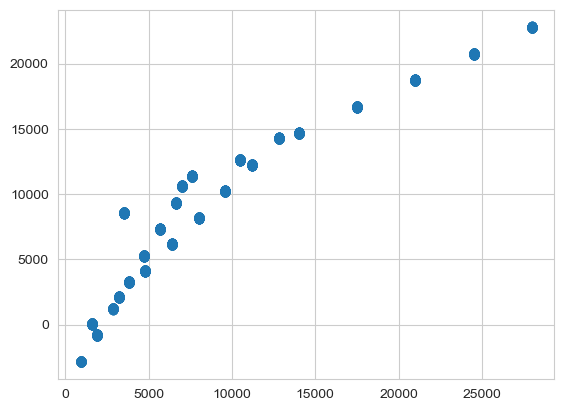

In [73]:
plt.scatter(y_test,predictions)

<Axes: ylabel='total_room_price'>

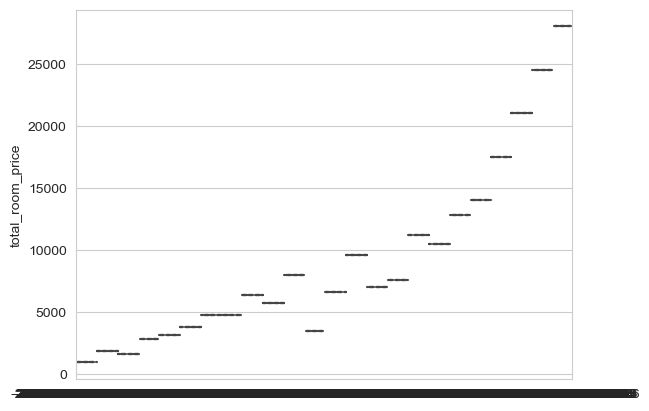

In [74]:
sns.boxplot(data=df,x=predictions,y=y_test)

### Outliers

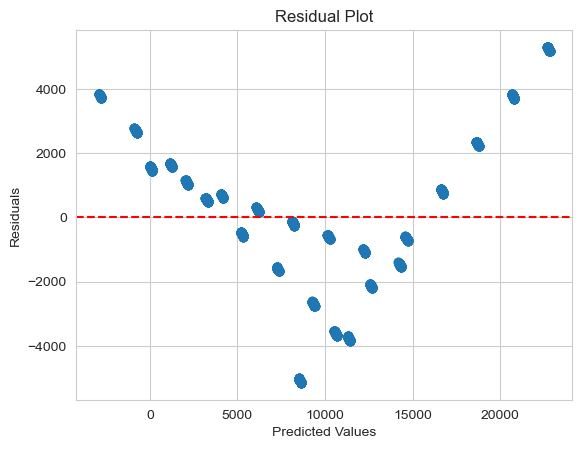

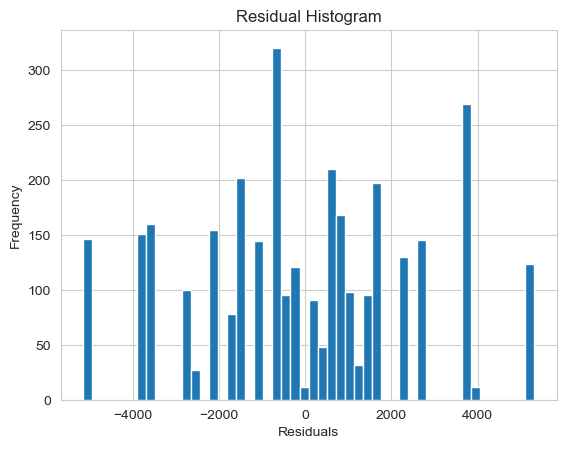

In [75]:

residuals = y_test - predictions

plt.scatter(predictions, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.show()

plt.hist(residuals, bins=50)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Histogram")
plt.show()


<a id = '4.0'></a>
<p style = "font-size : 20px; color : #000000 ; font-family : 'Times New Roman'; text-align : center; background-color : rgba(255, 0, 0, 0.5); border-radius: 1px 1px;"><strong>DECISION TREE REGRESSOR </strong></p> 

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

dt_regressor = DecisionTreeRegressor()

dt_regressor.fit(X_train, y_train)

predictions = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2_dt = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2_dt)


Mean Squared Error (MSE): 0.0
R-squared (R2): 1.0


<a id = '4.0'></a>
<p style = "font-size : 20px; color : #000000 ; font-family : 'Times New Roman'; text-align : center; background-color : rgba(255, 0, 0, 0.5); border-radius: 1px 1px;"><strong>RANDOM FOREST REGRESSOR </strong></p> 

 ## uses the default hyperparameters,

In [77]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
predictions = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2_rf = r2_score(y_test, predictions)

print("RandomForestRegressor Metrics:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2_rf)


RandomForestRegressor Metrics:
Mean Squared Error (MSE): 0.0
R-squared (R2): 1.0


### code snippet (with GridSearchCV) aims to find the best combination of hyperparameters for the RandomForestRegressor, potentially leading to improved performance on the test data.

In [78]:
rf_regressor = RandomForestRegressor(random_state=42)

In [79]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30]  
}


In [80]:
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [81]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [82]:
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']

In [83]:
best_rf_regressor = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)

In [1]:
best_rf_regressor.fit(X_train, y_train)

NameError: name 'best_rf_regressor' is not defined

In [85]:
predictions = best_rf_regressor.predict(X_test)

In [86]:
mse = mean_squared_error(y_test, predictions)
r2_rf = r2_score(y_test, predictions)

In [87]:
print("Best RandomForestRegressor Hyperparameters:")
print("n_estimators:", best_n_estimators)
print("max_depth:", best_max_depth)

Best RandomForestRegressor Hyperparameters:
n_estimators: 50
max_depth: None


In [88]:
print("\nRandomForestRegressor Metrics with Best Hyperparameters:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2_rf)


RandomForestRegressor Metrics with Best Hyperparameters:
Mean Squared Error (MSE): 0.0
R-squared (R2): 1.0


<a id = '4.0'></a>
<p style = "font-size : 20px; color : #000000 ; font-family : 'Times New Roman'; text-align : center; background-color : rgba(255, 0, 0, 0.5); border-radius: 1px 1px;"><strong>GRADIENT BOOSTING REGRESSOR </strong></p> 

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

gb_regressor.fit(X_train, y_train)

predictions = gb_regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2_gb = r2_score(y_test, predictions)

print("GradientBoostingRegressor Metrics:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2_gb)


GradientBoostingRegressor Metrics:
Mean Squared Error (MSE): 750.3974914105103
R-squared (R2): 0.9999848690900233


<a id = '4.0'></a>
<p style = "font-size : 20px; color : #000000 ; font-family : 'Times New Roman'; text-align : center; background-color : rgba(255, 0, 0, 0.5); border-radius: 1px 1px;"><strong>Hyperparameter Tuning </strong></p> 

### CROSS VALIDATION 

In [90]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(lm, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

mean_squared_errors = -cross_val_scores

mean_mse = np.mean(mean_squared_errors)
std_mse = np.std(mean_squared_errors)

print(f"Mean MSE: {mean_mse}")
print(f"Standard Deviation MSE: {std_mse}")
r2_cv = r2_score(y_test, predictions)
print("R2 Score:", r2_cv)


Mean MSE: 6324292.967571307
Standard Deviation MSE: 173057.16394783385
R2 Score: 0.9999848690900233


### GRID SEARCH CV

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_search = GridSearchCV(estimator=lm, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)


predictions = best_model.predict(X_test)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2_gs = r2_score(y_test, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2_gs)


Best Hyperparameters: {'fit_intercept': True, 'positive': True}
MAE: 2010.8802578432962
MSE: 6224217.715522824
RMSE: 2494.8382142982387
R2 Score: 0.8744957452458804


## *Now we just make model for future predictions*

In [138]:
import pickle
filename = 'Project5.pkl'
pickle.dump(dt_regressor, open(filename, 'wb'))

In [139]:
models = pd.DataFrame({
    'Model' : [ 'Linear Regression','Decision Tree Regressor', 'Random Forest Regressor','Gradient Boosting Regressor',
             'Cross Validation','Grid Search(CV)'],
    'Score' : [r2_lr,r2_dt, r2_rf, r2_gb, r2_cv, r2_gs]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Decision Tree Regressor,1.000000
2,Random Forest Regressor,1.000000
3,Gradient Boosting Regressor,0.999985
4,Cross Validation,0.999985
5,Grid Search(CV),0.874496
0,Linear Regression,0.874492


In [140]:
X_test.head()

,Room_price,No_of_days,month,online
7909,1600,5,11,0
33,1600,8,7,1
3143,3500,6,11,0
5026,1600,5,7,0
3238,3500,3,4,1


In [141]:
X.columns

Index(['Room_price', 'No_of_days', 'month', 'online'], dtype='object')

In [142]:

load_model = pickle.load(open(filename,'rb'))



In [143]:
dt_regressor.predict([[1600,8,2,0]])

array([12800.])

In [144]:
load_model.predict([[1600,8,5,0]])

array([12800.])

In [145]:
lm.predict([[1600,8,5,0]])

array([14251.06245458])

In [146]:
best_rf_regressor.predict([[1600,8,5,0]])

array([12800.])

In [147]:
gb_regressor.predict([[1600,8,5,0]])

array([12795.47975364])

In [148]:
load_model.predict(([[1600,8,5,0]]))

array([12800.])

#### *so in future we make predictions by passing the new training data on this model*

In [ ]:
# import joblib

# loaded_model = joblib.load('best_model.pkl')


# predictions = loaded_model.predict(X_new)

#### by using the ^ above way we predict the Room_prices on future data

In [ ]:
#import pandas as pd

# Assuming you have extracted the data from the SQL database and stored it in a variable called 'data'
#df.to_csv('data.csv', index=False)
